In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import scienceplots
import seaborn as sns
import matplotlib.animation as animation
from scipy.fft import rfft, rfftfreq

N_voltages      = 500
max_time        = 2e-4
sample_rate     = (N_voltages-1)/max_time
time_steps      = np.linspace(0,max_time,N_voltages)
time_steps      = time_steps[1:]
blue_color      = '#4477AA'
red_color       = '#EE6677'

cmeter      = 1/2.54
single_col  = 8.6


# Main

In [105]:
dfs     = []
n_stat  = 0
for i in range(0,10):

    for j in range(10):

        df_tmp          = pd.read_csv(f"Nx=7_Ny=7_Nz=1_Ne=8_{i}_{j}.csv")
        dfs.append(df_tmp)
        n_stat += 1
df          = sum(dfs)/len(dfs)
test        = pd.DataFrame(np.std(np.stack(dfs), axis=0), columns=df.columns)
df['Error'] = test['Current']
df          = df.drop(columns=['Eq_Jumps'])
df['Error'] = df['Error']/np.sqrt(n_stat)

df

,E0,E1,E2,E3,E4,E5,E6,E7,G,Jumps,Current,Error
0,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87990.08,1.622251,0.174246
1,0.049604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90776.17,1.672637,0.193564
2,0.048423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93320.69,1.198019,0.159737
3,0.046475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95516.07,0.574083,0.110808
4,0.043791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97465.87,0.324534,0.083955
...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.040414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750730.70,0.299577,0.081126
495,0.043791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,752687.21,0.424402,0.100202
496,0.046475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,754892.50,0.773881,0.139872
497,0.048423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,757442.01,1.248118,0.171140


## I-O dependency

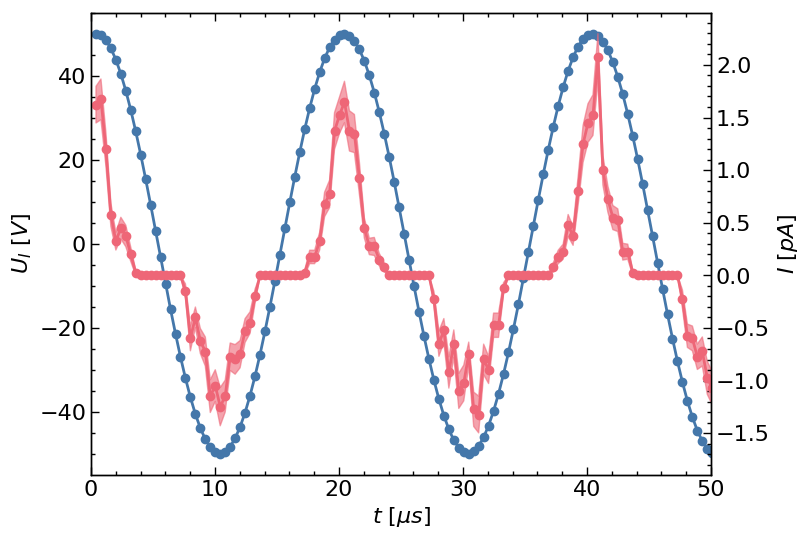

In [114]:
with plt.style.context(['science', 'bright', 'notebook']):
    
    fig = plt.figure()
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot(time_steps*10**6, df['E0']*1000, '-o', color=blue_color)
    ax2.plot(time_steps*10**6, df['Current'], '-o', color=red_color)
    ax2.fill_between(time_steps*10**6, df['Current']-df['Error'], df['Current']+df['Error'], color=red_color, alpha=.6)
    ax1.set_xlabel('$t$ [$\mu s$]')
    ax1.set_ylabel('$U_I$ [$V$]')
    ax2.set_ylabel('$I$ [$pA$]')
    ax1.set_xlim(0,50)
    ax1.set_ylim(-55,55)
    # ax2.set_ylim(-55,55)
    
plt.show()

## Frequency

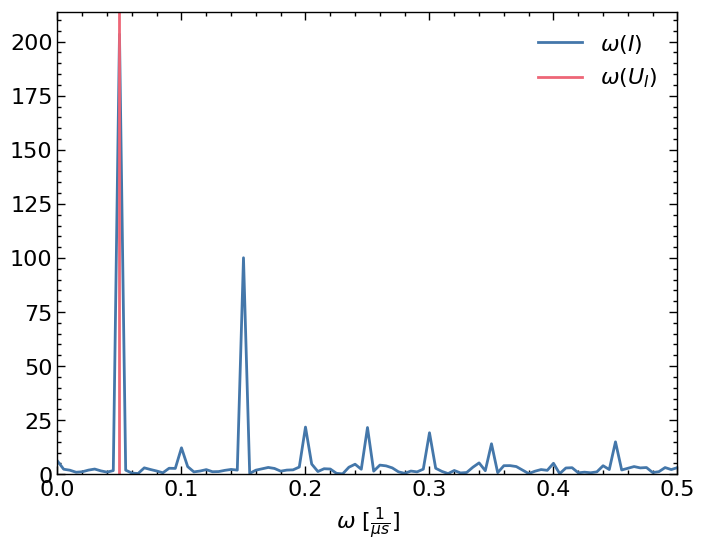

In [117]:
signal  = np.int16((df['Current'].values / df['Current'].values.max()) * 32767)
signal  = df['Current'].values
input_f = (0.5e5)/10**6

with plt.style.context(['science', 'bright', 'notebook']):

    yf = rfft(signal)
    xf = rfftfreq(N_voltages-1, 1 / sample_rate)

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.plot(xf/10**6, np.abs(yf), label="$\omega(I)$")
    ax.axvline(input_f, color=red_color, label="$\omega(U_I)$")
    ax.set_xlabel("$\omega$ [$\\frac{1}{\mu s}$]")
    ax.set_ylim(0)
    ax.set_xlim(0,0.5)
    ax.legend()

plt.show()

## combined

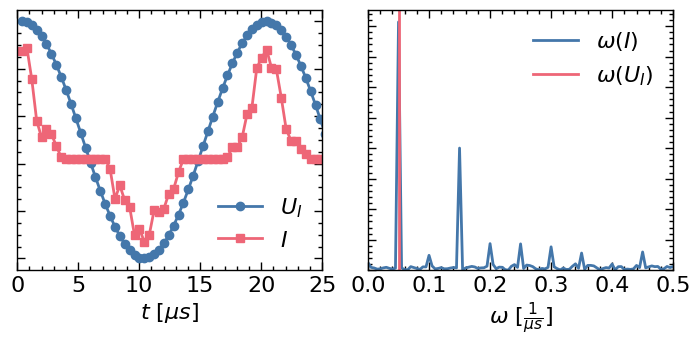

In [149]:
def min_max(arr):
    return (arr - np.min(arr))/(np.max(arr) - np.min(arr))

signal  = np.int16((df['Current'].values / df['Current'].values.max()) * 32767)
signal  = df['Current'].values
input_f = (0.5e5)/10**6

with plt.style.context(['science', 'bright','notebook']):

    fig = plt.figure()
    fig.set_figwidth(2.5*single_col*cmeter)
    fig.set_figheight(single_col*cmeter/1)

    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(time_steps*10**6, min_max(df['E0'].values), '-o', color=blue_color, label='$U_I$')
    ax1.plot(time_steps*10**6, min_max(df['Current'].values), '-s', color=red_color, label='$I$')
    # ax1.fill_between(time_steps*10**6, min_max(df['Current']-df['Error']), min_max(df['Current']+df['Error']), color=red_color, alpha=.6)
    ax1.set_xlabel('$t$ [$\mu s$]')
    # ax1.set_ylabel('Signal')
    ax1.set_xlim(0,25)
    ax1.set_yticklabels("")
    ax1.legend(loc='lower right')

    yf = rfft(signal)
    xf = rfftfreq(N_voltages-1, 1 / sample_rate)

    ax  = fig.add_subplot(1,2,2)
    ax.plot(xf/10**6, np.abs(yf), label="$\omega(I)$")
    ax.axvline(input_f, color=red_color, label="$\omega(U_I)$")
    ax.set_xlabel("$\omega$ [$\\frac{1}{\mu s}$]")
    ax.set_ylim(0)
    ax.set_xlim(0,0.5)
    ax.legend()
    ax.set_yticklabels("")
    plt.subplots_adjust(wspace=0.15)

    fig.savefig(f"plots/1_In_1_Out_time_dep.svg", bbox_inches='tight', transparent=True)
    fig.savefig(f"plots/1_In_1_Out_time_dep.pdf", bbox_inches='tight', transparent=False)

plt.show()

In [108]:
blue_color          = '#4477AA'
red_color           = '#EE6677'

with plt.style.context(["science","nature","bright"]):
    
    fig, ax1    = plt.subplots(dpi=200)
    ax2         = ax1.twinx()

    ax1.errorbar(x=time_steps[:-1]*1000 ,y=df['O'], yerr=df['sO'], c=blue_color)
    ax2.plot(time_steps[:-1]*1000, df['I']*1000, c=red_color)
    ax1.set_xlabel("Time [ms]")
    ax1.set_ylabel("Output [pA]")
    ax2.set_ylabel("Input [mV]")

    ax1.legend(['Output'], loc='lower left')
    ax2.legend(['Input'], loc='lower right')

    ax1.set_ylim(-1500,1500)
    ax2.set_ylim(-50,50)

plt.show()

KeyError: 'O'

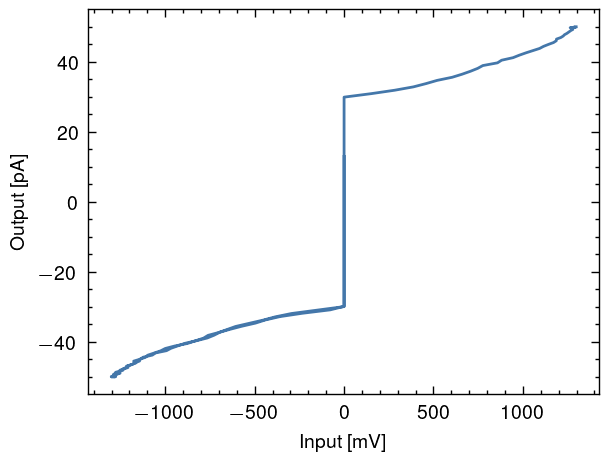

In [62]:
with plt.style.context(["science","nature","bright"]):
    
    fig, ax1    = plt.subplots(dpi=200)
    df          = dic[0.5]

    ax1.plot(df['O'], df['I']*1000)
    ax1.set_xlabel("Input [mV]")
    ax1.set_ylabel("Output [pA]")
    plt.show()

# States

In [63]:
f_mult          = 2
states          = pd.read_csv(f"time_mean_state_Nx=2_Ny=2_Nz=1_Ne=2_6_f{f_mult}.csv")
states.columns  = [i for i in range(2,6)]
states[0]       = 100
states[1]       = 100
states          = states[[0,1,2,3,4,5]]
edges   = pd.read_csv(f"time_net_currents_Nx=2_Ny=2_Nz=1_Ne=2_0_f{f_mult}.csv").columns
pos     = {0:(0,0),
           1:(1.5,1.5),
           2:(0.5,0.5),
           3:(1,0.5),
           4:(0.5,1),
           5:(1,1),
           }

G       = nx.Graph()
G.add_edges_from([eval(i) for i in edges])

In [64]:
fig     = plt.figure()
ax_c    = []

for row in range(len(states)):

    node_sizes  = {j:np.abs(states.iloc[row,j]) for j in range(6)}
    size        = np.array([node_sizes[0],node_sizes[2],node_sizes[1],node_sizes[5],node_sizes[3],node_sizes[4]])

    ax = fig.add_subplot()
    nx.draw_networkx(G, pos=pos, node_size=200*np.log(size), ax=ax)
    plt.axis('off')
    
    ax_c.append([ax])

ani = animation.ArtistAnimation(fig=fig, artists=ax_c, interval=50, repeat_delay=500)

/home/jonas/.local/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [65]:
ani.save("test.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.
/home/jonas/.local/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
